In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

from sklearn.datasets import load_iris

In [6]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'],
iris['target']], columns= iris['feature_names'] +
['target'])
# Display the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [10]:
x = data[['sepal length (cm)', 'sepal width (cm)']]
y = (data['target']==2).astype(int)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [11]:
model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print('classifiaction report :\n',classification_report(y_test,y_pred))

Accuracy:0.90
classifiaction report :
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



SyntaxError: unterminated string literal (detected at line 6) (3684552751.py, line 6)

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


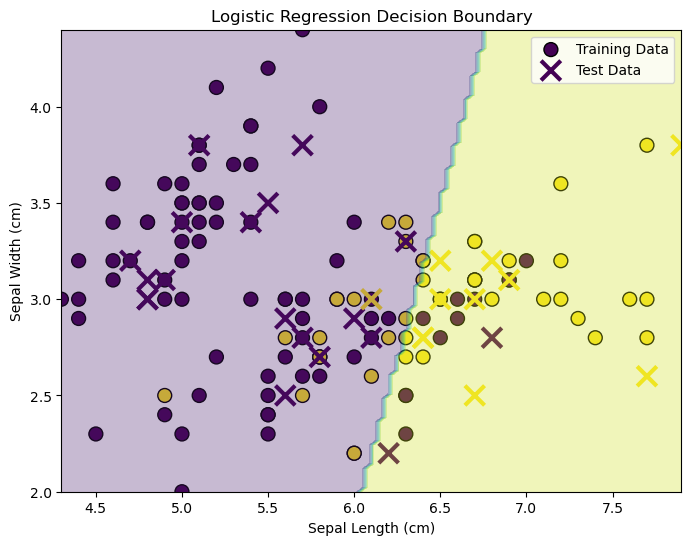

In [24]:
# Visualize decision boundary
plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train, cmap='viridis', edgecolors='k',
            s=100, label='Training Data')

# Plot the test points
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test, cmap='viridis', marker='x',
            s=200, linewidth=3, label='Test Data')

# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(x['sepal length (cm)'].min(), x['sepal length (cm)'].max(), 100),
                     np.linspace(x['sepal width (cm)'].min(), x['sepal width (cm)'].max(), 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary')

# Add legend
plt.legend()

# Show the plot
plt.show()